In [ ]:
"""
RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
"""

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [7]:
churn_data = pd.read_csv('data/churn.csv') 
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
def out_red(text):
    print("\033[3m\033[31m\033[50m{}".format(text))

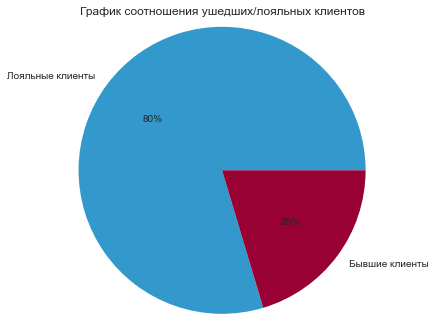

Из диаграммы понятно, что каждый пятый клиент уходит


In [9]:
# Задание 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited_percent = churn_data['Exited'].value_counts()
plt.pie(exited_percent, labels=['Лояльные клиенты', 'Бывшие клиенты'], colors=['#3399CC','#990033'], autopct='%.0f%%', radius=1.2)
plt.title('График соотношения ушедших/лояльных клиентов')
plt.show()
text = 'Из диаграммы понятно, что каждый пятый клиент уходит'
out_red(text)

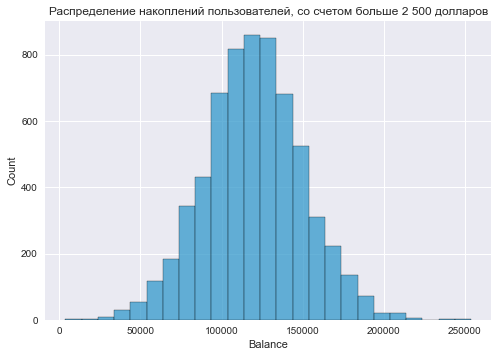

По гистограмме распределение можно отнести к нормальному


In [10]:
# Задание 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
sns.histplot(data=churn_data.query('Balance > 2500'), x='Balance', stat='count', binwidth=10000, color='#3399CC')
plt.title('Распределение накоплений пользователей, со счетом больше 2 500 долларов')
plt.show()
text = 'По гистограмме распределение можно отнести к нормальному'
out_red(text)

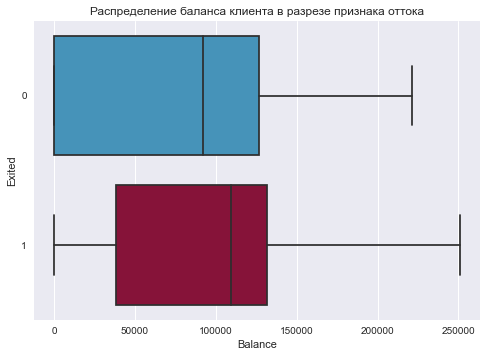

Распределение баланса по оттоку:
   ушедшие клиенты - ширина ящика значительно меньше, что может свидеиельствовать о большей однородности ушедших клиентов по размерам вкладов
   локальные клиенты - совпадает минимальное значение и значение нижнего квартиля, что может свидетельствовать о большом кол-ве лояльных клиентов с минимальными вкладами
   медианы по значению близки друг к другу


In [57]:
'''
Задание 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и 
лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
'''
sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',  
    palette=['#3399CC','#990033']
)
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.show()
out_red('Распределение баланса по оттоку:')
out_red('   ушедшие клиенты - ширина ящика значительно меньше, что может свидеиельствовать о большей однородности ушедших клиентов по размерам вкладов')
out_red('   локальные клиенты - совпадает минимальное значение и значение нижнего квартиля, что может свидетельствовать о большом кол-ве лояльных клиентов с минимальными вкладами')
out_red('   медианы по значению близки друг к другу')

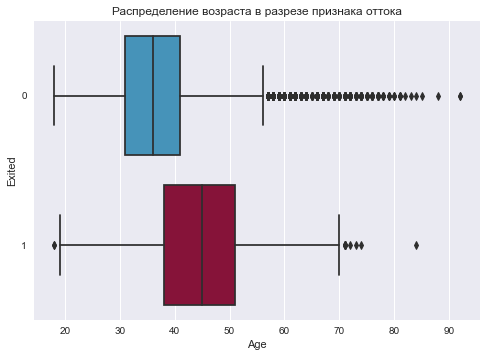

Распределение оттока клиента по возрасту:
   лояльные клиенты - по возрасту лет на 10 старше ушедших и в возрасте от 38 до 51 года
   ушедшие клиенты - в возрасте от 31 до 41 года, необходимо обратить внимание на работу с этой возрастной группой


In [58]:
'''
Задание 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
В какой группе больше потенциальных выбросов? На какую возрастную категорию 
клиентов стоит обратить внимание банку?
'''
sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    palette=['#3399CC','#990033']
)
plt.title('Распределение возраста в разрезе признака оттока')
plt.show()
out_red('Распределение оттока клиента по возрасту:')
out_red('   лояльные клиенты - по возрасту лет на 10 старше ушедших и в возрасте от 38 до 51 года')
out_red('   ушедшие клиенты - в возрасте от 31 до 41 года, необходимо обратить внимание на работу с этой возрастной группой')

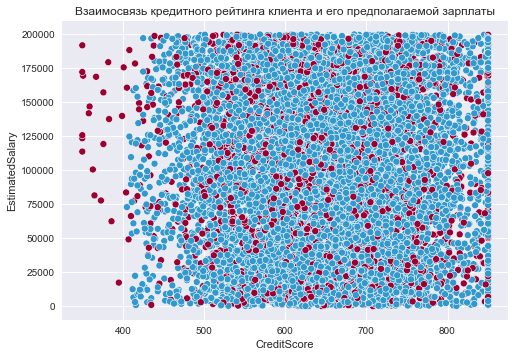

Ярковыраженной взаимосвязи между кредитным рейтингом клиента, его заработной платой и лояльностью клиента нет


In [64]:
'''
Задание 9.5. Постройте график, который показывает взаимосвязь кредитного 
рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку 
оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной 
взаимосвязи, укажите это.
'''
sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    palette=['#3399CC','#990033'],
    legend=''
)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.show()
out_red('Ярковыраженной взаимосвязи между кредитным рейтингом клиента, его заработной платой и лояльностью клиента нет')


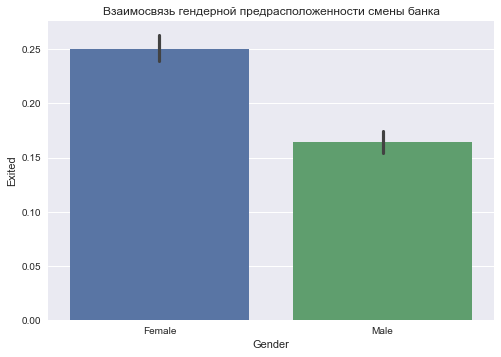

Женшины на 8% больше, чем мужчины меняют банк, но женщин меньше в нашем исследовании, что показывает следующий график


In [88]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
sns.barplot(x='Gender', y='Exited', data=churn_data)
plt.title('Взаимосвязь гендерной предрасположенности смены банка')
plt.show()
out_red('Женшины на 8% больше, чем мужчины меняют банк, но женщин меньше в нашем исследовании, что показывает следующий график')

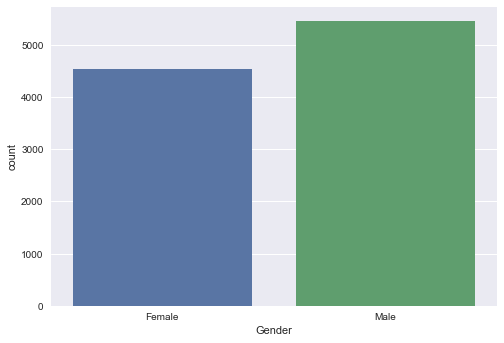

In [89]:
sns.countplot(x='Gender', data=churn_data)
plt.show()

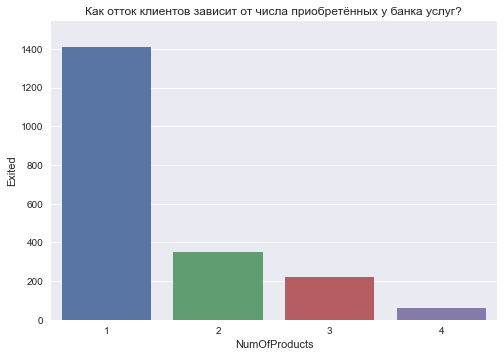

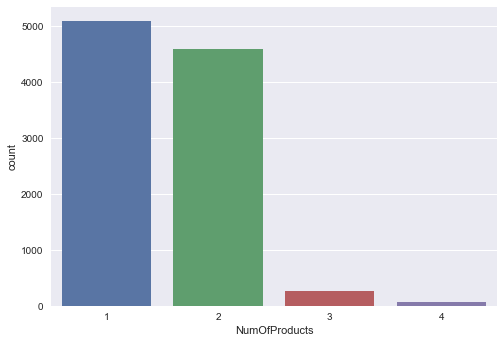

Отток уменьшается при покупке уже второй услуги, что подтверждается следующим графиком, так как количество купивших вторую услугу незначительно меньше, чем тех, кто купил только первую, но ооток уменьшился почти в 4 раза


In [93]:
'''
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
'''

sns.barplot(data=churn_data, x='NumOfProducts', y='Exited', estimator=sum, errwidth=0)
plt.title('Как отток клиентов зависит от числа приобретённых у банка услуг?')
plt.show()
sns.countplot(x='NumOfProducts', data=churn_data)
plt.show()
out_red('Отток уменьшается при покупке уже второй услуги, что подтверждается следующим графиком, так как количество купивших вторую услугу незначительно меньше, чем тех, кто купил только первую, но ооток уменьшился почти в 4 раза')

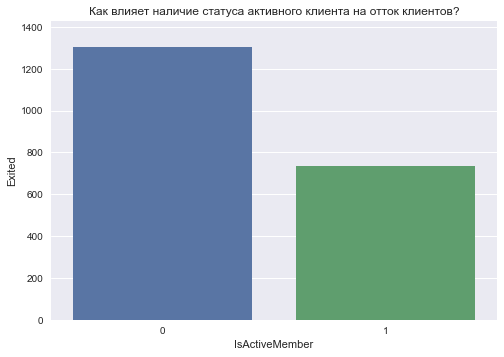

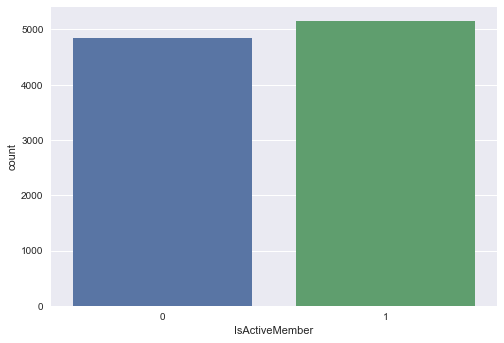

Статус активного клиента значительно снижает отток, что подтверждается следующим графиком, так как количество активных и неактивных клиентов близки по количеству


In [95]:
'''
Задание 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
чтобы уменьшить отток клиентов среди неактивных?
'''

sns.barplot(data=churn_data, x='IsActiveMember', y='Exited', estimator=sum, errwidth=0)
plt.title('Как влияет наличие статуса активного клиента на отток клиентов?')
plt.show()
sns.countplot(x='IsActiveMember', data=churn_data)
plt.show()
out_red('Статус активного клиента значительно снижает отток, что подтверждается следующим графиком, так как количество активных и неактивных клиентов близки по количеству')

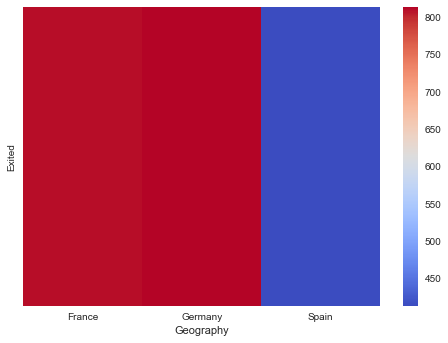

Ушедших клиентов значительно больше во Франции и Германии. Гораздо меньше в Испании


In [99]:
'''
Задание 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, 
которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
'''

grouped = (
churn_data
    .groupby(by='Geography', as_index=False)['Exited']
    .sum()
)
pivot = grouped.pivot_table(
    values='Exited',
    columns='Geography'
)
sns.heatmap(data=pivot, cmap="coolwarm")
plt.show()
out_red('Ушедших клиентов значительно больше во Франции и Германии. Гораздо меньше в Испании')

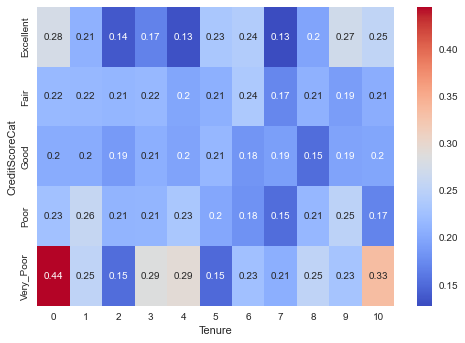

Чаще всего уходит категория Very_Poor, независимо от срока обслуживания. Наиболее устойчивая категория Excellent


In [102]:
'''
Задание 9.10. Постройте сводную таблицу, строками которой являются категории кредитного 
рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент 
пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться 
среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
'''

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
sns.heatmap(data=pivot, annot=True, cmap='coolwarm')
plt.show()
out_red('Чаще всего уходит категория Very_Poor, независимо от срока обслуживания. Наиболее устойчивая категория Excellent')